In [112]:
import tensorflow as tf

In [113]:
from tensorflow.examples.tutorials.mnist import input_data

In [114]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [115]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [116]:
mnist.train.images.shape

(55000, 784)

In [117]:
sample = mnist.train.images[3001].reshape(28,28)

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

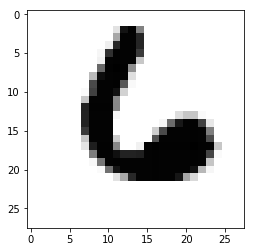

In [119]:
plt.imshow(sample,cmap='Greys')

In [120]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [121]:
n_classes = 10
n_samples = mnist.train.num_examples

In [122]:
n_input = 784

In [123]:
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

In [124]:
# Creating function for a multilayer perceptron

def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights : Dict of weights
    biases : dict of bias values
    '''
    
    # First Hidden layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELUFunc(X * W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    return out_layer

In [125]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [126]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [127]:
x = tf.placeholder('float',[None,n_input])

In [128]:
y = tf.placeholder('float',[None,n_classes])

In [129]:
pred = multilayer_perceptron(x,weights,biases)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [142]:
# Training the Model
t = mnist.train.next_batch(10)


In [143]:
Xsamp,ysamp = t

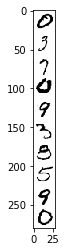

In [149]:
plt.imshow(Xsamp.reshape(280,28),cmap="Greys")

In [145]:
ysamp

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# Model Evaluation